/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible sta

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           41     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.82201D+00    |proj g|=  8.22163D-01

At iterate    5    f=  7.27314D+00    |proj g|=  1.24391D-01

At iterate   10    f=  7.23750D+00    |proj g|=  3.76001D-02

At iterate   15    f=  7.21196D+00    |proj g|=  1.07669D-01

At iterate   20    f=  7.18797D+00    |proj g|=  5.62223D-02

At iterate   25    f=  7.17344D+00    |proj g|=  3.81698D-02

At iterate   30    f=  7.16497D+00    |proj g|=  1.57189D-01

At iterate   35    f=  7.16100D+00    |proj g|=  8.45270D-02

At iterate   40    f=  7.15627D+00    |proj g|=  1.43558D-01

At iterate   45    f=  7.15411D+00    |proj g|=  2.19782D-01


/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.15116D+00    |proj g|=  2.78139D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   41     50     55      1     0     0   2.781D-01   7.151D+00
  F =   7.1511585205067112     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


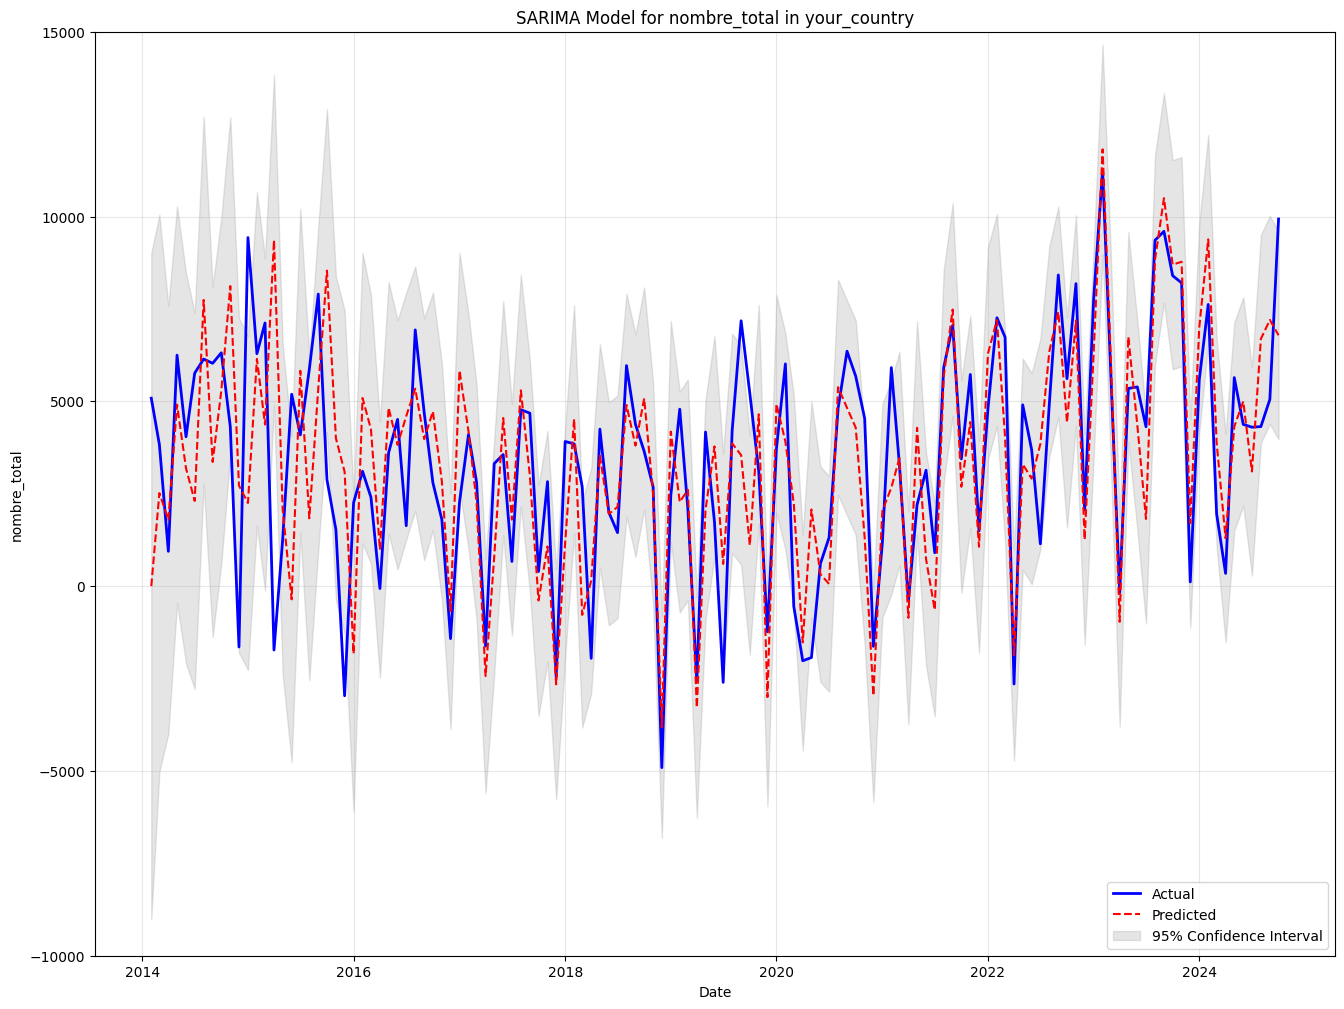

In [38]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("dataset_reformate2.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# List of countries to include in the sum
countries = ["Total Europe", "Total Africa", "Total America", "Total Asia", "Total Oceania", "Total Unknown Origin"]

# Filter data for the specified countries
df_countries = df[df['pays'].isin(countries)]

# Group by 'date' and sum 'entree_mensuelle'
df_sum = df_countries.groupby('date')['entree_mensuelle'].sum().reset_index()

# Set 'date' as index
df_sum = df_sum.set_index('date')

# Select the relevant column for SARIMA modeling 
data = df_sum['entree_mensuelle']
# Fit the SARIMA model (you'll need to determine the appropriate p, d, q, P, D, Q, s values)
# Example: SARIMA(p=1, d=1, q=1, P=1, D=1, Q=1, s=12) 
model = SARIMAX(data, order=(23, 1, 15), seasonal_order=(1, 1, 1, 24))
model_fit = model.fit()

# Get predictions and confidence intervals
pred = model_fit.get_prediction(start=0, end=len(data) - 1)
pred_ci = pred.conf_int()

# Plot the data and predictions
plt.figure(figsize=(16, 12))
plt.plot(data.index, data, label='Actual', color='blue', linewidth=2)
plt.plot(pred.predicted_mean.index, pred.predicted_mean, label='Predicted', color='red', linestyle='--')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1],
                 color='gray',
                 alpha=.2, 
                 label='95% Confidence Interval')

plt.title(f'SARIMA Model for nombre_total in your_country')
plt.xlabel('Date')
plt.ylabel('nombre_total')
plt.legend()
plt.ylim(-10000,15000)
#plt.ylim(1700000,2100000)
plt.grid(alpha=0.3)
#plt.xlim("2008-03-01",)
plt.show()

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible sta

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           49     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.57196D+00    |proj g|=  2.39170D+00

At iterate    5    f=  7.19795D+00    |proj g|=  7.80301D-02

At iterate   10    f=  7.15397D+00    |proj g|=  4.42061D-02

At iterate   15    f=  7.13750D+00    |proj g|=  3.06377D-02

At iterate   20    f=  7.12791D+00    |proj g|=  1.74625D-02

At iterate   25    f=  7.10627D+00    |proj g|=  1.68664D-01

At iterate   30    f=  7.09474D+00    |proj g|=  3.81362D-02

At iterate   35    f=  7.08667D+00    |proj g|=  3.54394D-02

At iterate   40    f=  7.08155D+00    |proj g|=  5.11416D-02

At iterate   45    f=  7.08013D+00    |proj g|=  2.71619D-02


/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  7.07917D+00    |proj g|=  1.66290D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   49     50     54      1     0     0   1.663D-02   7.079D+00
  F =   7.0791721081443661     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
MSE: 5456502.22290092


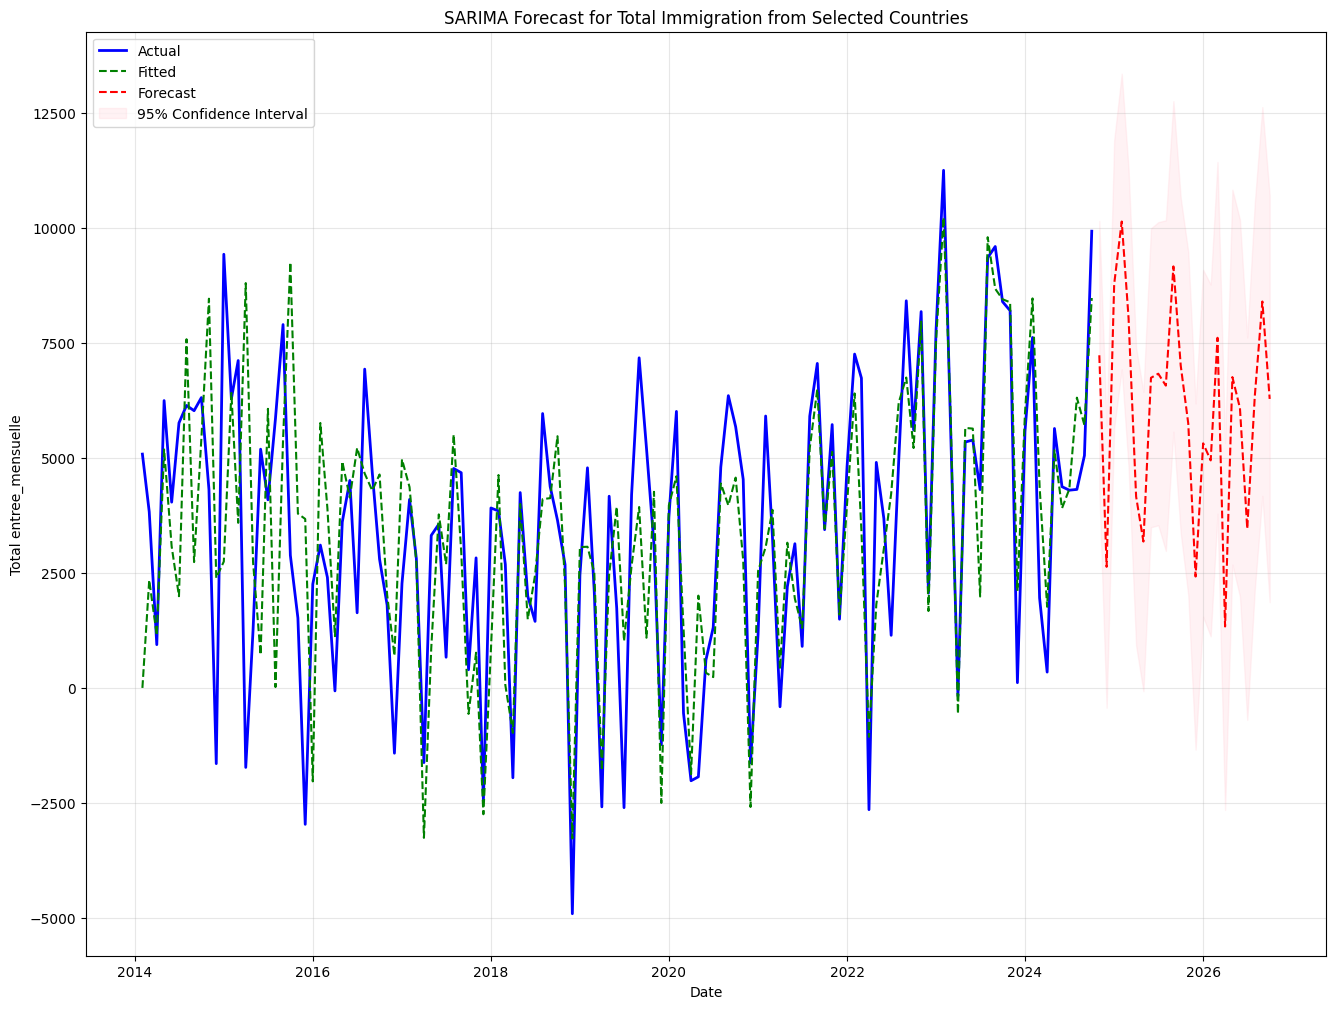

In [42]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("dataset_reformate2.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# List of countries to include in the sum
countries = ["Total Europe", "Total Africa", "Total America", "Total Asia", "Total Oceania", "Total Unknown Origin"]

# Filter data for the specified countries
df_countries = df[df['pays'].isin(countries)]

# Group by 'date' and sum 'entree_mensuelle'
df_sum = df_countries.groupby('date')['entree_mensuelle'].sum().reset_index()

# Set 'date' as index
df_sum = df_sum.set_index('date')

# Select the relevant column for SARIMA modeling 
data = df_sum['entree_mensuelle']

# Fit the SARIMA model (you'll need to determine the appropriate p, d, q, P, D, Q, s values)
# Example: SARIMA(p=1, d=1, q=1, P=1, D=1, Q=1, s=12) 
model = SARIMAX(data, order=(23, 1, 15), seasonal_order=(10, 1, 0, 24))
model_fit = model.fit()

# Forecast future values
forecast_steps = 24  # Forecast for the next 24 months
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Calculate MSE using fitted values
mse = np.mean((data - model_fit.fittedvalues)**2)
print(f"MSE: {mse}")

# Plot the data, predictions, and forecast
plt.figure(figsize=(16, 12))
plt.plot(data.index, data, label='Actual', color='blue', linewidth=2)
plt.plot(model_fit.fittedvalues.index, model_fit.fittedvalues, label='Fitted', color='green', linestyle='--')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red', linestyle='--')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color='pink',
                 alpha=.2, 
                 label='95% Confidence Interval')

plt.title(f'SARIMA Forecast for Total Immigration from Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total entree_mensuelle')
plt.legend()
plt.grid(alpha=0.3)
plt.show()